In [ ]:
import pandas as pd

df = pd.read_csv("april_theory_final_dataset.csv")
df.head()


,created_at,text,cleaned_text,sentiment_score,sentiment,top_words
0,4/12/2023 6:18,Day 5 of April Theory and I’m already sleeping...,day april theory im already sleeping better,0.4404,Positive,"day, april, theory"
1,4/6/2023 21:00,This April reset feels more natural than the w...,april reset feels natural whole new year pressure,0.0772,Positive,"april, reset, feels"
2,4/5/2023 22:42,Started my new habits in April and it's alread...,started new habits april already going better ...,0.4404,Positive,"new, started, habits"
3,4/15/2023 13:51,April Theory hits different when the sun is ou...,april theory hits different sun everything blo...,0.0000,Neutral,"april, theory, hits"
4,4/5/2023 14:44,April Theory is overhyped. Just my two cents.,april theory overhyped two cents,0.0000,Neutral,"april, theory, overhyped"


In [ ]:
# === 3. TEXT PREPROCESSING ===
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-zA-Z]", " ", text)  # remove punctuation/numbers
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

df['cleaned_text'] = df['text'].astype(str).apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# === 4. SENTIMENT ANALYSIS WITH VADER ===
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
df['scores'] = df['cleaned_text'].apply(lambda x: sia.polarity_scores(x))
df['compound'] = df['scores'].apply(lambda x: x['compound'])

df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


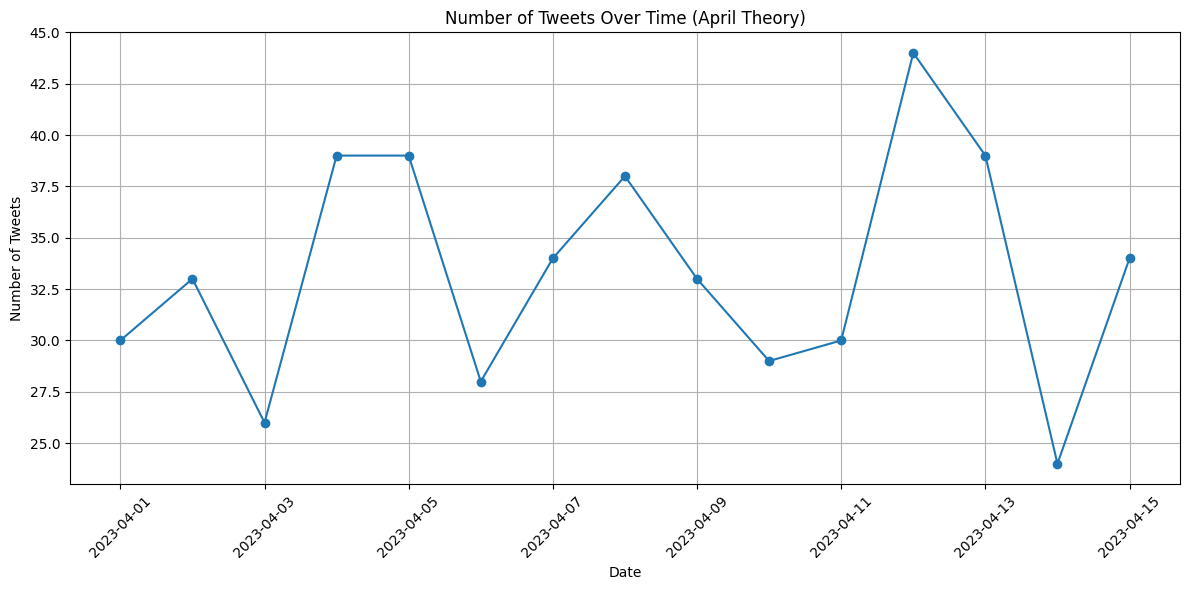

In [2]:
import pandas as pd

# Load your tweet data
df = pd.read_csv('april_theory_final_dataset.csv')

# Convert to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Group by date
df_grouped = df.groupby(df['created_at'].dt.date).size()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df_grouped.plot(kind='line', marker='o')
plt.title('Number of Tweets Over Time (April Theory)')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-33-8b563ab546e4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='sentiment', data=df, palette='Set2')


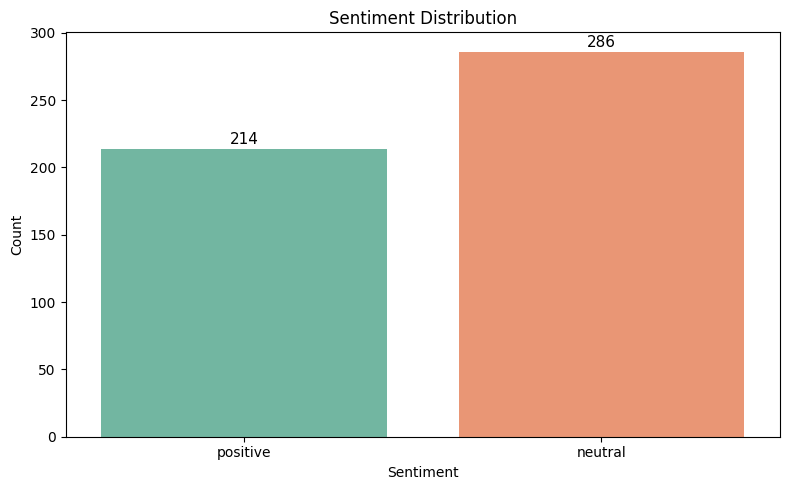

In [ ]:
# Barchart for sentiment
plt.figure(figsize=(8,5))
ax = sns.countplot(x='sentiment', data=df, palette='Set2')

# Add data labels
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2, count + 1),
                ha='center', va='bottom', fontsize=11)

plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
from wordcloud import WordCloud
from collections import Counter

# Join all top words into one string
all_top_words = ' '.join(df['top_words'].astype(str))


<ipython-input-15-1fa9865c1fd0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_words_df, x='count', y='word', palette='viridis')


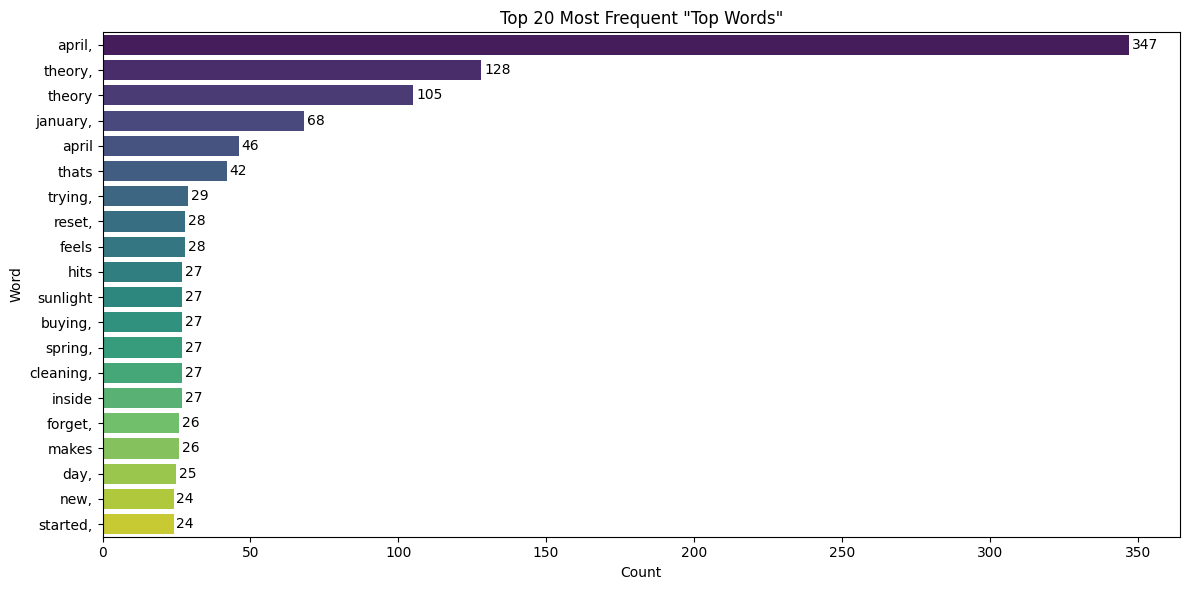

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=top_words_df, x='count', y='word', palette='viridis')

# Add data labels
for i, (count, word) in enumerate(zip(top_words_df['count'], top_words_df['word'])):
    ax.text(count + 1, i, str(count), va='center')

plt.title('Top 20 Most Frequent "Top Words"')
plt.xlabel('Count')
plt.ylabel('Word')
plt.tight_layout()
plt.show()